In [207]:
library(ConsensusClusterPlus)
library(mice)
library(cluster)
library(purrr)
library(factoextra)
library(clValid)

## 1. Load Data
---

In [208]:
X.mice <- read.table("data/imputed/mice_qvars_05.tsv", sep="\t", header=T)
X.mice.scaled <- scale(complete(X.mice))

In [209]:
data.df <- read.table("data/processed/AL_with_ccp_03.tsv", sep="\t", header=T, row.names=1)

## 2. Internal Validation
---

In [285]:
set.seed(123)

In [286]:
# Distance matrix
d <- dist(X.mice.scaled, method="euclidean")

# Heirarchical Clustering
hc.clust <- hclust(d, method="ward.D")

In [287]:
k <- 3

# Cut HC
hc.clust[[paste('clust_',k)]] <- cutree(as.hclust(hc.clust), k = k)

# K-means
kmeans.clust <- kmeans(X.mice.scaled, k)

# PAM
pam.clust <- pam(X.mice.scaled, k, diss=F, metric="euclidean")

# Fanny
fanny.clust <- fanny(X.mice.scaled, k, diss=F, metric="SqEuclidean", memb.exp=1.25)

# Clara
clara.clust <- clara(X.mice.scaled, 3, metric="manhattan", samples=100)

In [288]:
# Silhouette
hc.sil <- silhouette(cutree(as.hclust(hc.clust), k = k), d)
kmeans.sil <- silhouette(kmeans.clust$cluster, d)
pam.sil <- silhouette(pam.clust)
fanny.sil <- silhouette(fanny.clust)
clara.sil <- silhouette(clara.clust)

# Dunn
hc.dunn <- dunn(d, cutree(as.hclust(hc.clust), k = k))
kmeans.dunn <- dunn(d, kmeans.clust$cluster)
pam.dunn <- dunn(Data=X.mice.scaled, clusters=pam.clust$clustering)
fanny.dunn <- dunn(Data=X.mice.scaled, clusters=fanny.clust$clustering)
clara.dunn <- dunn(Data=X.mice.scaled, clusters=clara.clust$clustering)

# Connectivity
hc.connectivity <- connectivity(d, cutree(as.hclust(hc.clust), k = k))
kmeans.connectivity <- connectivity(d, kmeans.clust$cluster)
pam.connectivity <- connectivity(Data=X.mice.scaled, clusters=pam.clust$clustering)
fanny.connectivity <- connectivity(Data=X.mice.scaled, clusters=fanny.clust$clustering)
clara.connectivity <- connectivity(Data=X.mice.scaled, clusters=clara.clust$clustering)

In [289]:
ccp.sil <- silhouette(data.df[rownames(X.mice.scaled),"cluster_i"], d)
ccp.dunn <- dunn(d, data.df[rownames(X.mice.scaled),"cluster_i"])
ccp.connectivity <- connectivity(d, data.df[rownames(X.mice.scaled),"cluster_i"])

In [295]:
sil.scores <- c(summary(ccp.sil)$avg.width, summary(hc.sil)$avg.width,
  summary(kmeans.sil)$avg.width, summary(pam.sil)$avg.width, summary(fanny.sil)$avg.width, summary(clara.sil)$avg.width)
dunn.scores <- c(ccp.dunn, hc.dunn, kmeans.dunn, pam.dunn, fanny.dunn, clara.dunn)
connectivity.scores <- c(ccp.connectivity, hc.connectivity, kmeans.connectivity, pam.connectivity, fanny.connectivity, clara.connectivity)


In [296]:
df <- data.frame(sil.scores, dunn.scores, connectivity.scores)
rownames(df) <- c("CCP","HC","Kmeans","PAM","Fanny","CLARA")

,sil.scores,dunn.scores,connectivity.scores
,<dbl>,<dbl>,<dbl>
CCP,0.06196908,0.03486180,1386.227
HC,0.06192613,0.04157801,1022.067
Kmeans,0.07809049,0.04399049,1103.688
PAM,0.06209927,0.03467128,1407.615
Fanny,0.07674674,0.04421733,1212.983
CLARA,0.07959484,0.03949814,1650.225


In [298]:
silhouette(data.df

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: silhouette(data.df
   ^


In [131]:
sil <- silhouette(pam.clust)
summary(sil)$avg.width

[1] 0.06209927

In [132]:
sil <- silhouette(fanny.clust)
summary(sil)$avg.width

[1] 0.07674674

In [123]:
connectivity(d, hc.clust[[paste('clust_',k)]])

[1] 1022.067

In [119]:
hc.clust <- hclust(d, method="ward.D")
hc.clust[[paste('clust_',k)]] <- cutree(as.hclust(hc.clust), k = k)
connectivity(d, hc.clust[[paste('clust_',k)]])

[1] 1022.067

In [121]:
diana.clust[[paste('clust_',k)]] <- cutree(as.hclust(diana.clust), k = k)

In [122]:
connectivity(d, diana.clust[[paste('clust_',k)]])

[1] 8.215873

In [110]:
dunn(d, hc.clust[[paste('clust_',k)]])

[1] 0.04157801

In [101]:
# hc.clust[[paste('clust_',k)]]
# diana.clust[[paste('clust_',k)]]
# kmeans.clust$cluster
# pam.clust$clustering
# fanny.clust$clustering
# clara.clust$clustering

6102    9338    9419    9421    9422    9423    9429    9431    9432    9502 
      1       2       2       1       1       2       1       3       2       2 
   9505    9512    9517    9518    9519    9520    9521    9523    9525    9526 
      3       3       2       3       3       2       2       3       2       1 
   9527    9530    9534    9535    9538    9539    9540    9541    9542    9545 
      2       3       2       1       3       2       3       2       1       1 
   9546    9547    9548    9550    9552    9556    9602    9603    9606    9607 
      2       3       3       2       3       3       1       2       3       2 
   9608    9609    9610    9613    9615    9619    9621    9623    9624    9626 
      1       2       2       3       3       3       3       2       3       1 
   9627    9629    9633    9634    9635    9637    9640    9643    9644    9645 
      3       2       2       3       2       3       3       2       2       2 
   9646    9647    9648    9649    9650    9652    9654    9657    9659    9662 
      3       3       3       2       1       2       3       2       3       2 
   9665    9666    9669    9670    9672    9673    9674    9675    9676    9677 
      2       3       1       3       2       1       2       1       3       1 
   9682    9683    9684    9685    9687    9688    9689    9690    9692    9693 
      3       1       2       1       3       2       2       3       2       2 
   9694    9697    9698    9701    9703    9705    9706    9708    9709    9710 
      3       2       1       1       2       1       2       2       2       3 
   9711    9713    9714    9717    9720    9721    9722    9724    9725    9726 
      2       3       3       3       1       3       1       3       3       3 
   9727    9728    9729    9731    9732    9733    9734    9737    9738    9739 
      1       2       2       1       3       3       1       2       2       3 
   9740    9741    9743    9744    9746    9748    9750    9751    9752    9753 
      2       1       3       3       2       3       1       2       3       3 
   9754    9755    9756    9757    9758    9759    9762    9764    9765    9766 
      2       3       3       1       3       2       1       1       2       1 
   9767    9768    9769    9771    9772    9773    9774    9775    9776    9777 
      3       3       1       1       2       3       3       3       2       3 
   9778    9779    9781    9782    9783    9785    9786    9788    9790    9791 
      1       2       2       1       3       3       3       3       1       2 
   9792    9793    9794    9795    9796    9797    9798    9799   97100   97101 
      2       2       2       2       2       2       1       2       1       1 
  97102   97105   97106   97108   97109   97111   97112   97113   97114   97115 
      3       2       3       2       3       3       1       2       1       1 
  97116   97117   97120   97121   97124   97125   97127   97129   97130   97131 
      3       1       3       1       1       3       2       1       2       1 
  97133   97136   97137   97138   97140   97141   97142   98000   98001   98004 
      2       2       2       3       2       3       3       3       3       1 
  98005   98007   98010   98011   98014   98015   98017   98018   98021   98022 
      2       3       3       3       2       2       2       2       3       2 
  98025   98028   98029   98030   98034   98035   98037   98038   98039   98040 
      3       3       2       2       3       1       1       2       3       3 
  98041   98042   98045   98046   98047   98048   98049   98051   98054   98057 
      3       2       3       1       2       1       3       1       3       1 
  98058   98059   98060   98061   98062   98063   98069   98070   98073   98075 
      3       1       1       2       2       1       2       3       2       3 
  98076   98079   98080   98081   98083   98087   98089   98091   98092   98098 
      3       2       3       2   

6102    9338    9419    9421    9422    9423    9429    9431    9432    9502 
      1       2       2       3       1       2       1       1       2       2 
   9505    9512    9517    9518    9519    9520    9521    9523    9525    9526 
      2       1       2       1       2       2       1       1       1       2 
   9527    9530    9534    9535    9538    9539    9540    9541    9542    9545 
      2       2       2       1       2       1       1       2       2       2 
   9546    9547    9548    9550    9552    9556    9602    9603    9606    9607 
      2       1       1       1       1       1       1       2       2       2 
   9608    9609    9610    9613    9615    9619    9621    9623    9624    9626 
      2       2       1       1       1       1       2       1       2       1 
   9627    9629    9633    9634    9635    9637    9640    9643    9644    9645 
      2       1       1       2       2       1       1       2       2       1 
   9646    9647    9648    9649    9650    9652    9654    9657    9659    9662 
      1       1       3       2       3       1       1       1       2       1 
   9665    9666    9669    9670    9672    9673    9674    9675    9676    9677 
      2       1       1       1       2       1       2       1       1       2 
   9682    9683    9684    9685    9687    9688    9689    9690    9692    9693 
      1       1       2       3       2       1       2       1       2       1 
   9694    9697    9698    9701    9703    9705    9706    9708    9709    9710 
      2       2       1       1       2       2       3       2       1       1 
   9711    9713    9714    9717    9720    9721    9722    9724    9725    9726 
      2       1       1       1       1       1       2       1       2       2 
   9727    9728    9729    9731    9732    9733    9734    9737    9738    9739 
      2       2       2       1       1       2       1       1       2       1 
   9740    9741    9743    9744    9746    9748    9750    9751    9752    9753 
      1       3       1       1       1       1       1       1       3       1 
   9754    9755    9756    9757    9758    9759    9762    9764    9765    9766 
      2       1       1       1       1       2       1       3       2       1 
   9767    9768    9769    9771    9772    9773    9774    9775    9776    9777 
      1       1       2       2       2       2       2       1       1       1 
   9778    9779    9781    9782    9783    9785    9786    9788    9790    9791 
      2       2       2       2       1       1       1       1       2       2 
   9792    9793    9794    9795    9796    9797    9798    9799   97100   97101 
      1       2       2       2       1       2       1       2       2       2 
  97102   97105   97106   97108   97109   97111   97112   97113   97114   97115 
      1       1       1       2       1       1       3       2       1       2 
  97116   97117   97120   97121   97124   97125   97127   97129   97130   97131 
      1       1       1       1       3       1       2       1       1       3 
  97133   97136   97137   97138   97140   97141   97142   98000   98001   98004 
      2       3       2       3       1       2       1       1       1       3 
  98005   98007   98010   98011   98014   98015   98017   98018   98021   98022 
      1       1       1       2       1       2       2       2       1       1 
  98025   98028   98029   98030   98034   98035   98037   98038   98039   98040 
      1       1       1       2       2       2       1       2       3       1 
  98041   98042   98045   98046   98047   98048   98049   98051   98054   98057 
      3       2       1       1       2       3       1       1       1       2 
  98058   98059   98060   98061   98062   98063   98069   98070   98073   98075 
      1       3       2       2       1       2       2       1       2       2 
  98076   98079   98080   98081   98083   98087   98089   98091   98092   98098 
      1       2       1       3   

In [89]:
connectivity(d, 

ERROR: Error in eval(expr, envir, enclos): object 'connectivity' not found


In [51]:
clara.clust$clusinfo

size,max_diss,av_diss,isolation
519,58.74465,17.56111,3.920285
563,44.92679,16.61537,2.998159
992,58.39008,16.55900,3.647106


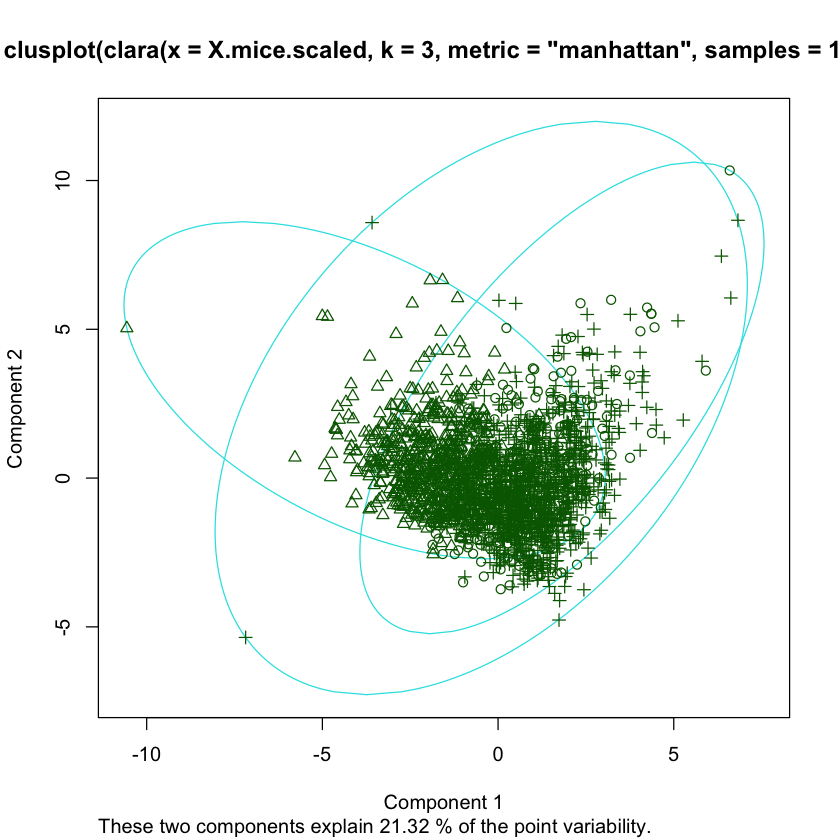

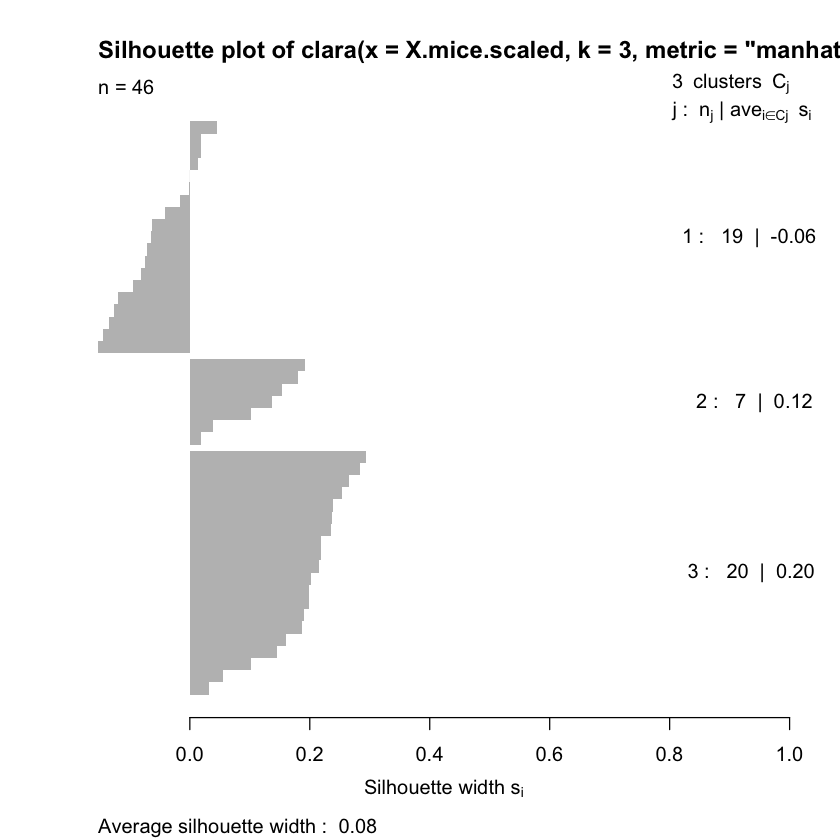

In [52]:

plot(clara.clust)

In [14]:
?clara

clara {cluster},R Documentation
x,"data matrix or data frame, each row corresponds to an observation, and each column corresponds to a variable. All variables must be numeric. Missing values (NAs) are allowed."
k,"integer, the number of clusters. It is required that 0 < k < n where n is the number of observations (i.e., n = nrow(x))."
metric,"character string specifying the metric to be used for calculating dissimilarities between observations. The currently available options are ""euclidean"", ""manhattan"", and ""jaccard"". Euclidean distances are root sum-of-squares of differences, and manhattan distances are the sum of absolute differences."
stand,"logical, indicating if the measurements in x are standardized before calculating the dissimilarities. Measurements are standardized for each variable (column), by subtracting the variable's mean value and dividing by the variable's mean absolute deviation."
cluster.only,"logical; if true, only the clustering will be computed and returned, see details."
samples,"integer, say N, the number of samples to be drawn from the dataset. The default, N = 5, is rather small for historical (and now back compatibility) reasons and we recommend to set samples an order of magnitude larger."
sampsize,"integer, say j, the number of observations in each sample. sampsize should be higher than the number of clusters (k) and at most the number of observations (n = nrow(x)). While computational effort is proportional to j^2, see note below, it may still be advisable to set j = sampsize to a larger value than the (historical) default."
trace,integer indicating a trace level for diagnostic output during the algorithm.
medoids.x,"logical indicating if the medoids should be returned, identically to some rows of the input data x. If FALSE, keep.data must be false as well, and the medoid indices, i.e., row numbers of the medoids will still be returned (i.med component), and the algorithm saves space by needing one copy less of x."
keep.data,"logical indicating if the (scaled if stand is true) data should be kept in the result. Setting this to FALSE saves memory (and hence time), but disables clusplot()ing of the result. Use medoids.x = FALSE to save even more memory."


size,max_diss,av_diss,isolation
1151,37.72284,4.483516,9.4591621
920,27.14418,5.201292,6.8065197
3,12.73961,5.659486,0.4582666


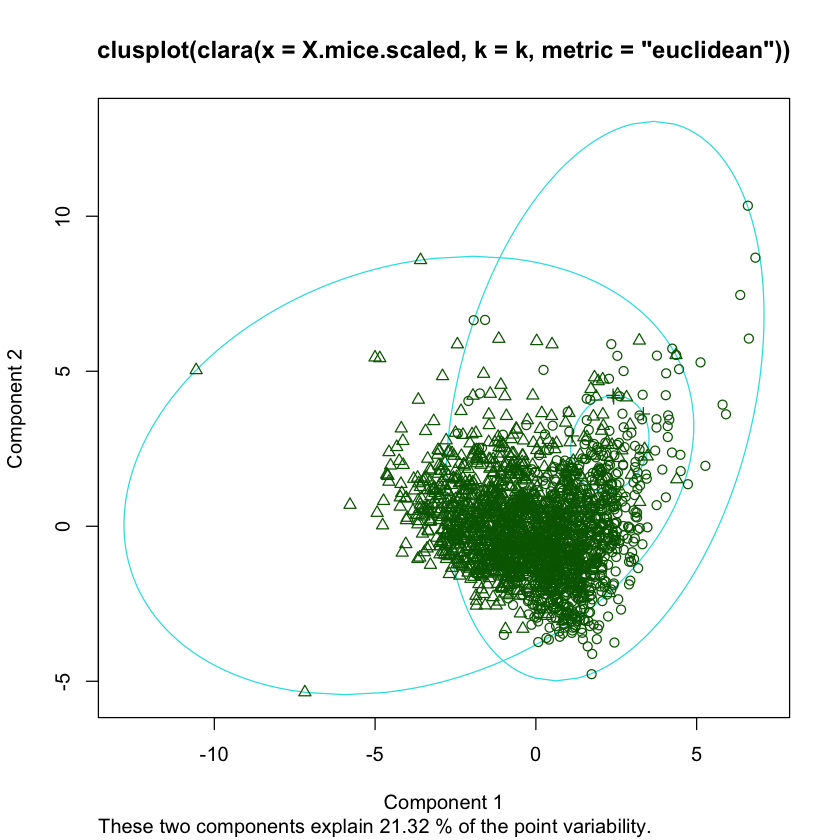

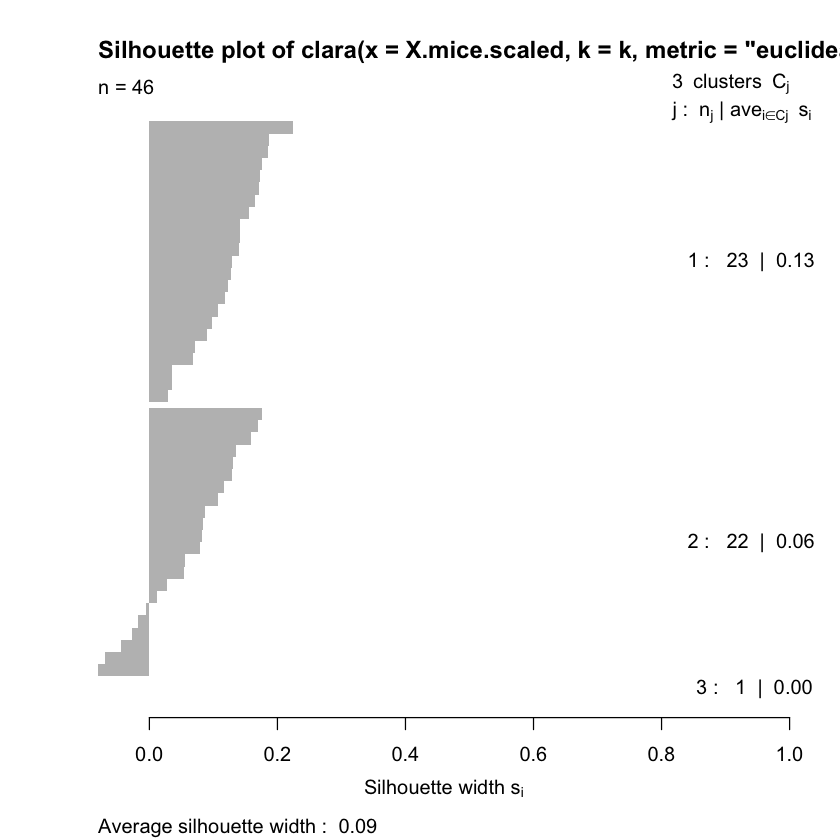

In [11]:
plot(clara.clust)

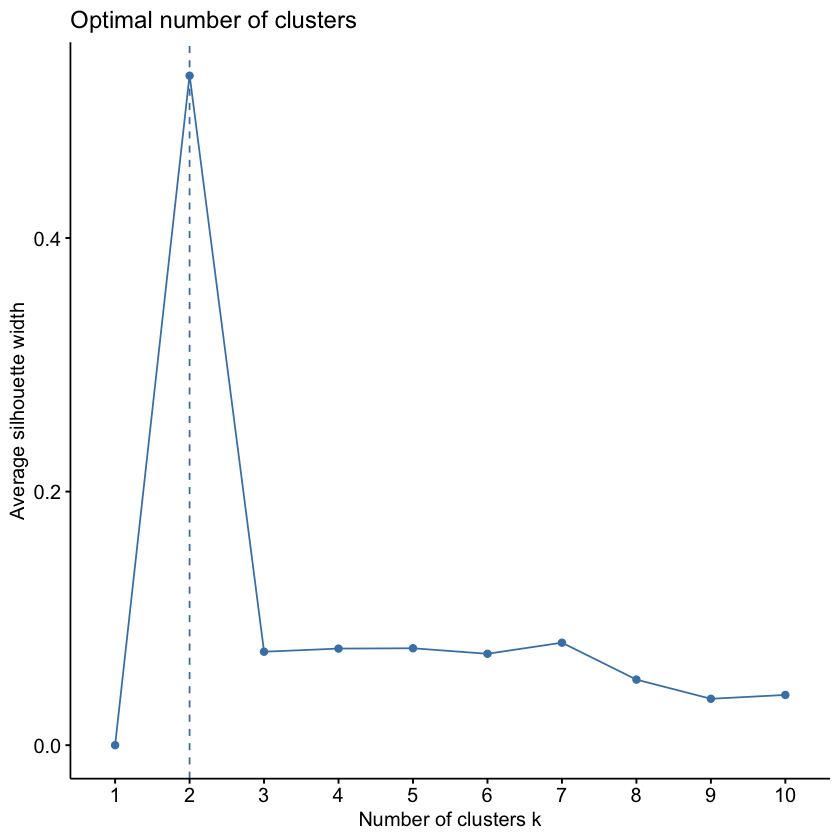

In [10]:
fviz_nbclust(X.mice.scaled, clara, method ="silhouette")

In [46]:
h3$clusinfo

size,max_diss,av_diss,diameter,separation
849,33.98855,4.073346,39.15534,1.557766
675,27.14418,4.694287,35.22910,1.951129
550,37.36847,5.442935,44.92957,1.557766


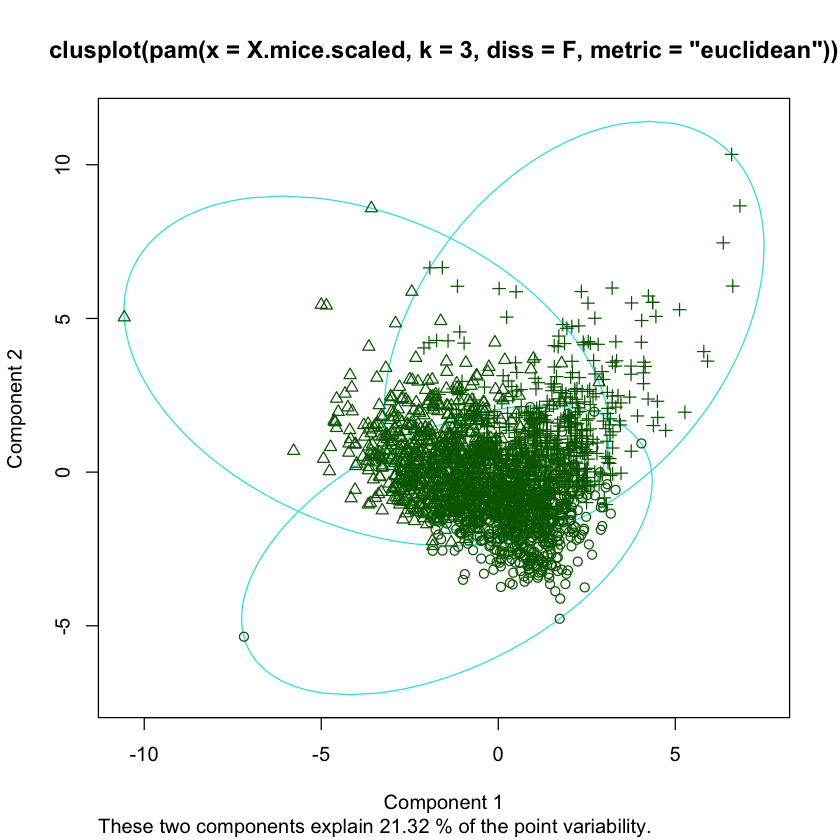

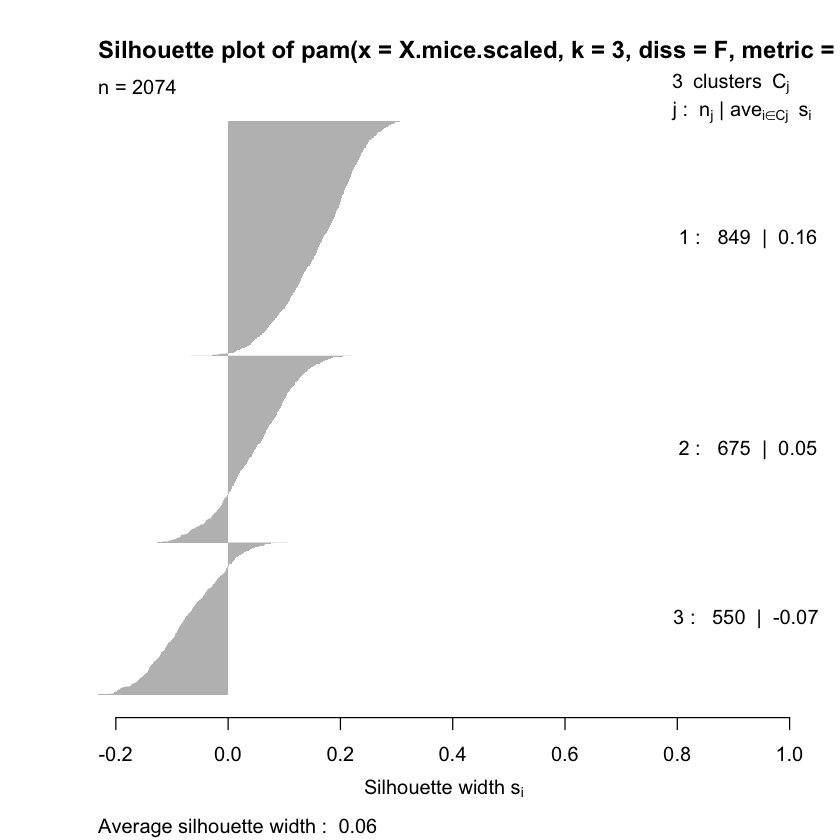

In [47]:
plot(h3)

In [57]:
?fanny

fanny {cluster},R Documentation
x,"data matrix or data frame, or dissimilarity matrix, depending on the value of the diss argument. In case of a matrix or data frame, each row corresponds to an observation, and each column corresponds to a variable. All variables must be numeric. Missing values (NAs) are allowed. In case of a dissimilarity matrix, x is typically the output of daisy or dist. Also a vector of length n*(n-1)/2 is allowed (where n is the number of observations), and will be interpreted in the same way as the output of the above-mentioned functions. Missing values (NAs) are not allowed."
k,integer giving the desired number of clusters. It is required that 0 < k < n/2 where n is the number of observations.
diss,"logical flag: if TRUE (default for dist or dissimilarity objects), then x is assumed to be a dissimilarity matrix. If FALSE, then x is treated as a matrix of observations by variables."
memb.exp,number r strictly larger than 1 specifying the membership exponent used in the fit criterion; see the ‘Details’ below. Default: 2 which used to be hardwired inside FANNY.
metric,"character string specifying the metric to be used for calculating dissimilarities between observations. Options are ""euclidean"" (default), ""manhattan"", and ""SqEuclidean"". Euclidean distances are root sum-of-squares of differences, and manhattan distances are the sum of absolute differences, and ""SqEuclidean"", the squared euclidean distances are sum-of-squares of differences. Using this last option is equivalent (but somewhat slower) to computing so called “fuzzy C-means”. If x is already a dissimilarity matrix, then this argument will be ignored."
stand,"logical; if true, the measurements in x are standardized before calculating the dissimilarities. Measurements are standardized for each variable (column), by subtracting the variable's mean value and dividing by the variable's mean absolute deviation. If x is already a dissimilarity matrix, then this argument will be ignored."
iniMem.p,"numeric n \times k matrix or NULL (by default); can be used to specify a starting membership matrix, i.e., a matrix of non-negative numbers, each row summing to one."
cluster.only,"logical; if true, no silhouette information will be computed and returned, see details."
"keep.diss, keep.data",logicals indicating if the dissimilarities and/or input data x should be kept in the result. Setting these to FALSE can give smaller results and hence also save memory allocation time.
"maxit, tol",maximal number of iterations and default tolerance for convergence (relative convergence of the fit criterion) for the FANNY algorithm. The defaults maxit = 500 and tol = 1e-15 used to be hardwired inside the algorithm.


Warning message in fanny(X.mice.scaled, 4, diss = F, metric = "SqEuclidean", memb.exp = 1.25):
“FANNY algorithm has not converged in 'maxit' = 500 iterations”


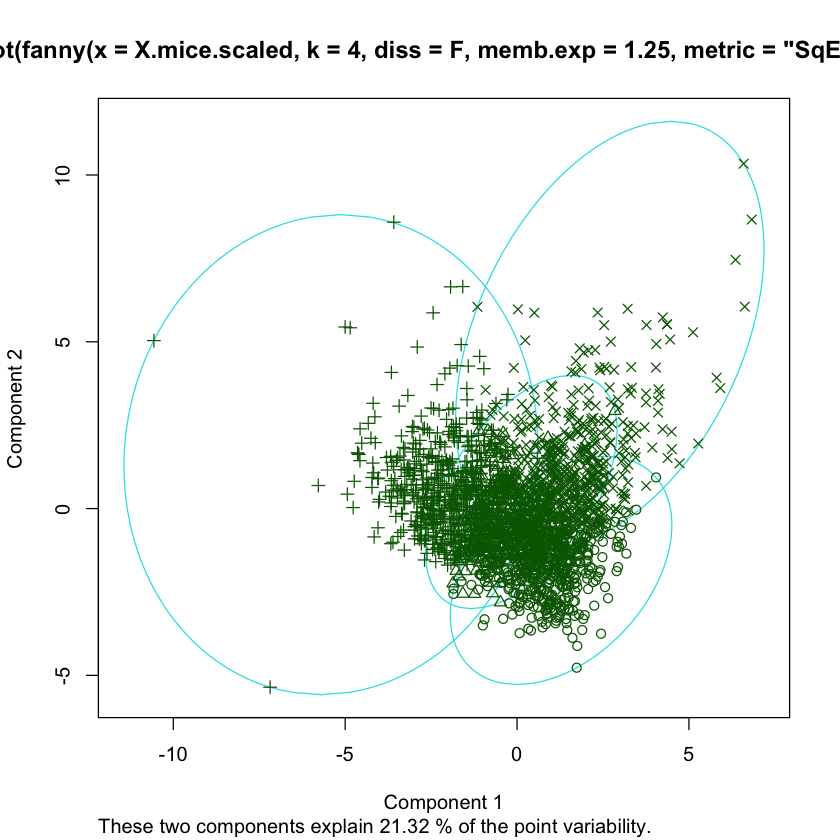

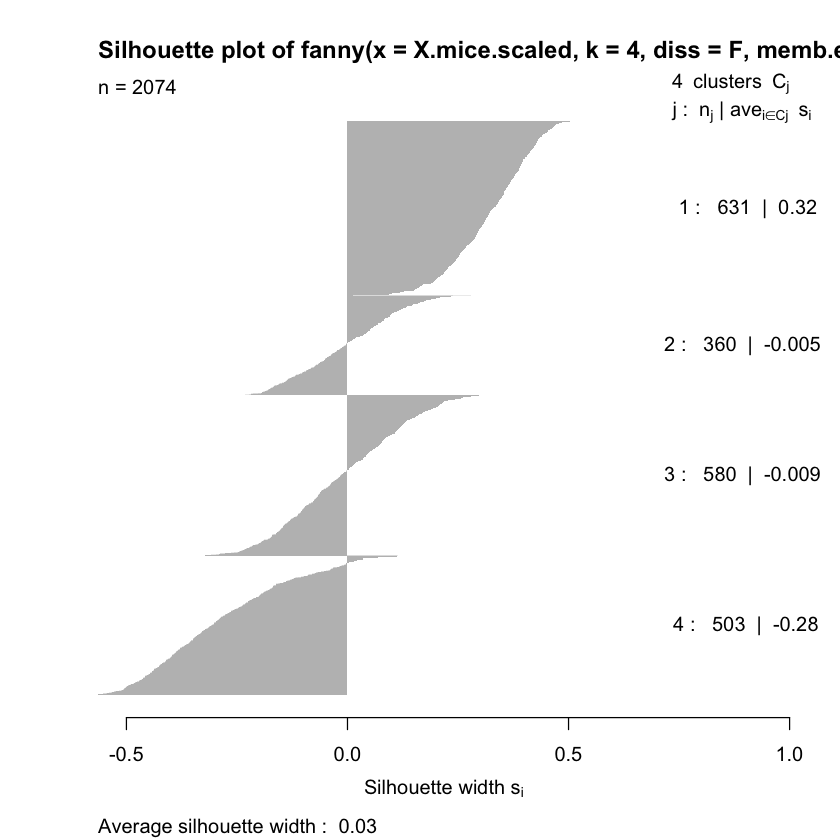

In [59]:
h3 <- fanny(X.mice.scaled, 4, diss=F, metric="SqEuclidean", memb.exp=1.25)
plot(h3)

In [1]:
fviz_cluster(pam.clust, 
             #palette =c("#007892","#D9455F"),
             ellipse.type ="euclid",
             #repel =TRUE,
             ggtheme =theme_minimal())

ERROR: Error in fviz_cluster(pam.clust, ellipse.type = "euclid", ggtheme = theme_minimal()): could not find function "fviz_cluster"


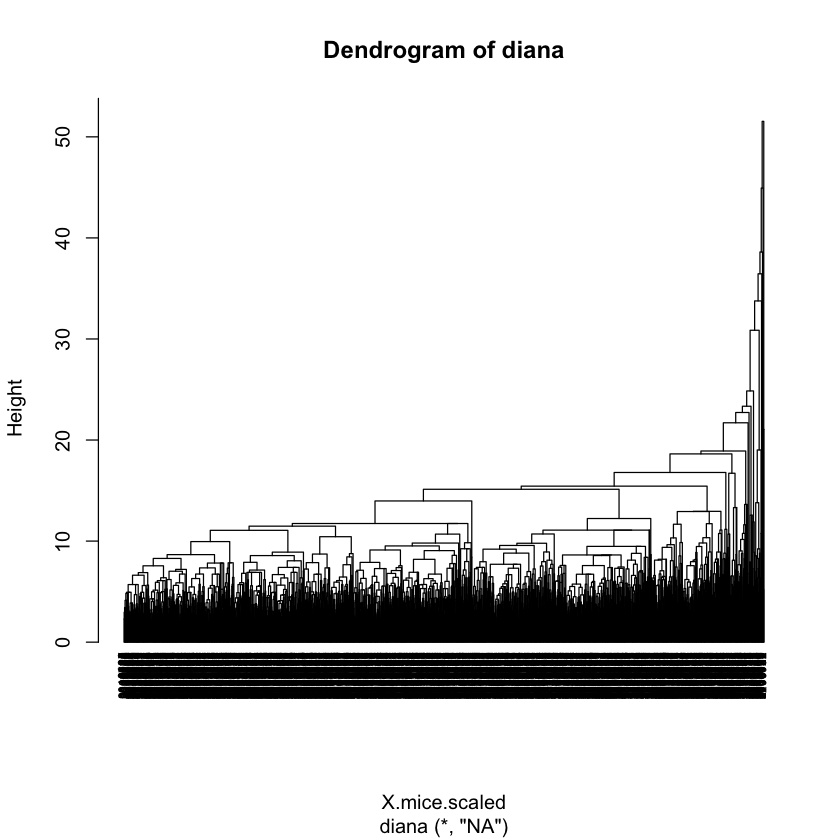

In [23]:
# hc2 <- agnes(X.mice.scaled, method="ward")
# pltree(hc2, cex = 0.6, hang = -1, main = "Dendrogram of agnes") 

hc4 <- diana(X.mice.scaled, diss=F)
pltree(hc4, cex = 0.6, hang = -1, main = "Dendrogram of diana")